# Class 4: Bayesian Statistics 
Feb 13th 2025

## Recall Bayes Rule: 
$$
p(A|B) = \frac{p(B|A)p(A)}{p(B)}
$$

**Elements of the Bayes' Rule Equation:**
* p(A|B) - posterior
* p(B|A) - likelihood
* p(A) - prior 
* p(B) - marginal likelihood (can also be marginalized over: $\sum_i p(B|A_i)p(A_i)$)



### Astro Example: 
We are looking into the sky and measuring if the signal is type quiet or loud. 
* there is a true positive rate of correctly identifying loud as p(+|loud) = 0.8
* false positive rate: p(+|quite) = 0.3
* our priors are that p(loud) = .1, p(quiet) = .9

What is the probability that what is observed as loud is indeed loud (p(loud|+))? 

$$
p(loud|+) = \frac{p(+|loud)p(loud)}{\sum(p(+|loud)p(loud) + p(+|quite)p(quite))} = \frac{0.8 * .1}{8. * .1 + .3 * .9} 
$$

Then to check if a given change in the false positive rate or the signal rate would be more impactful, we would just plug these values into this equation. 

## What to do when Prior, posterior and likelihoods disagree:

* Well, the ideal scenario is for the prior, likelihood and the posterior to align a bunch. 
* Posterior and the likelihood have to be normalized to 1. 
    * so how do we deal with a truncated normal distribution?

### Issue 1: 
If your prior is really different from your likelihood, then you might want to consider your experiment/hypothesis. 

Canonical error propagation treats multiplication and division as the same. 

ex:  (A and B are gaussian)
$$V = \frac{A}{B \pm \sigma_B}$$

*!! But when we have an uncertainty in the denominator, the uncertainties are no longer symetric. 
$$
\frac{1}{1+.1} != \frac{1}{.9} 
$$

For the fish example, when we get k=12, our posterior and our priors start to disagree a bunch! 


### Issue 2: 
Our prior is helpful, bit out likelihood is super flat.

If we just use the frequentest approach, we would get poor estimates. 

But if we use the Bayesian approach, we will a nice answer. 

## Exercise #1

We want to count the total number of items (cells, fish, ect) by tagging a known number, releasing them into the population, resampling them and counting how many of these have a tag.

We extract K that are identified (tagged, radioactive marked, isotope altered, etc.) and released back into the population (N). After sufficiently re-mixing, n things are extracted and checked as to whether they have been previously tagged (k).  

* n=60, K=100, and k=10,
You'd think that the right way to solve this is to just calculate: 
$$
N = 100/10*60
$$

But we don't just want a number, we want a posterior distribution. 

We will use Bayes' rule and 
. 
is the posterior and provides the conditional probability of the total
population (N) given k=10.
* Using Bayes’ theorem, and knowing that we have data where k=10, K=100,
and n=60 the posterior is proportional to the likelihood of
* is a ‘sampling w/o replacement’ likelihood and is a hypergeometric probability. You
can go online and find the quasi-binomial form of this likelihood, which is technically a
probability mass function (PMF), and a PMF is the PDF for discrete variables. I suggest
representing the hypergeometric as the combination of 3 binomial functions as described at
wikipedia (https://en.wikipedia.org/wiki/Hypergeometric_distribution)
* We will come back to the marginal likelihood later, but for now pick a fixed number
* The posterior is then produced by using and scanning across values of N
* Using a flat prior, i.e. prior is constant, plot the posterior distribution P


**Hypergeometric distribution**
 hypergeometric distribution is a discrete probability distribution that describes the probability of 
k successes (random draws for which the object drawn has a specified feature) in n draws, without replacement, from a finite population of size  N that contains exactly K objects with that feature, wherein each draw is either a success or a failure. In contrast, the binomial distribution describes the probability of k successes in n draws with replacement.

![image.png](attachment:image.png)

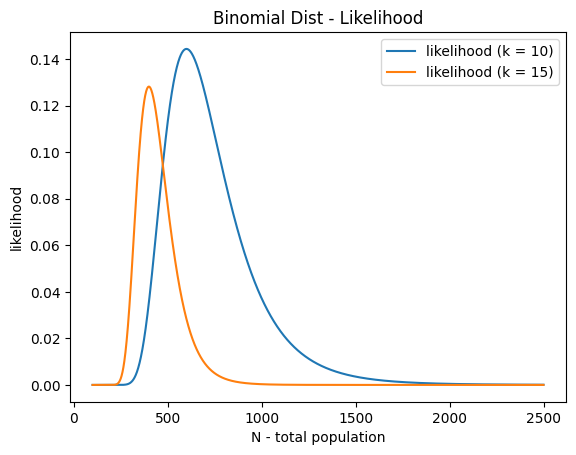

/var/folders/g7/f9_8q8fx7hd605y1w5g3bljw0000gn/T/ipykernel_22232/2691020654.py:13: RuntimeWarning: divide by zero encountered in divide
  pr = 1./N


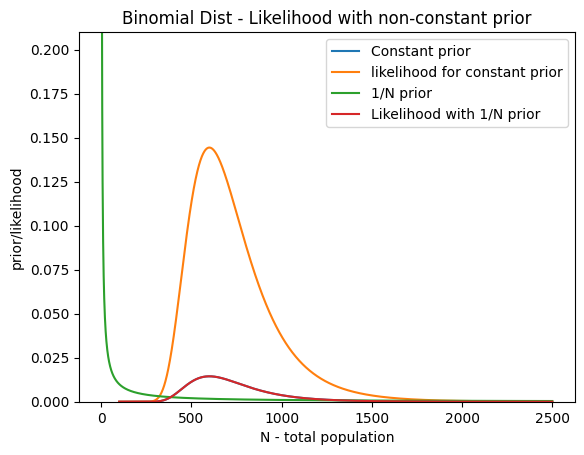

In [2]:
import numpy as np

import scipy.special
import matplotlib.pyplot as plt


def prior(N):
    pr = .1
    return pr
# end def

def prior_2(N):
    pr = 1./N
    return pr
# end def

def prior_3( N, mean, sigma):
    pr = math.exp(-1./2*((N-mean)/sigma)**2)/(sigma*math.sqrt(2*math.pi))
    return pr
# end def


K   = 100
n   = 60
k_0 = 10
k_1 = 15

N = np.array(range(0, 2500))

likelihood_k10 = scipy.special.binom(K,k_0)*scipy.special.binom(N-K,n-k_0)/scipy.special.binom(N,n)

k15 = 15
likelihood_k15 = scipy.special.binom(K,k_1)*scipy.special.binom(N-K,n-k_1)/scipy.special.binom(N,n)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(N, likelihood_k10, label='likelihood (k = 10)')
ax.plot(N, likelihood_k15, label='likelihood (k = 15)')
ax.set_xlabel('N - total population')
ax.set_ylabel('likelihood')
ax.set_title('Binomial Dist - Likelihood')
ax.legend()
plt.show()



# calculate the likelihood with a non constant prior: 
# likelihood * prior
likelihodd_non_const_prior_k10 = likelihood_k10 * prior(N)
fig, ax = plt.subplots()
ax.plot(N, likelihood_k10*[prior(n) for n in N], label='Constant prior')
ax.plot(N, likelihood_k10, label='likelihood for constant prior')
ax.plot(N, prior_2(N), label='1/N prior')
ax.plot(N, likelihodd_non_const_prior_k10, label='Likelihood with 1/N prior')

# # add a max point: 
# max_point = np.max(likelihodd_non_const_prior_k10)
# print(max_point)
# ax.scatter(max_point, likelihodd_non_const_prior_k10[max_point], 'ro', label = f'max point (non constant prior)')# {np.round(likelihodd_non_const_prior_k10[max_point])}')

# max_point = np.argmax(likelihood_k10)
#ax.scatter(max_point, likelihood_k10[max_point], 'bo', label = f'max point (constant prior) {np.round(likelihood_k10[max_point])}')
ax.set_ylim(0, 0.21)
ax.set_xlabel('N - total population')
ax.set_ylabel('prior/likelihood')
ax.set_title('Binomial Dist - Likelihood with non-constant prior')
ax.legend()

## Exercise #3 (Fish)

Goal: Estimate the volume in a lake based on an estimate of the fish population (N) and the average volume of water they like to occupy. . 

Assume that there is good mixing after tagging n fish, and no fish death 

- Mean volume of water = 500 +/ 300 m (assume gaussian),
- prior is that there are ~ 500 fish in the lake
- K = 50 # tagged fish
- n  = 30  # number sampled
- k = 4 # number of tagged fish in sample

### questions: 
1. How do we convert the number of fish probability distribution to the volume of water
* just multiply the V water * # fish/V water

2. How do we calculate uncertainties? 
* What I did is super wrong. To be exact, I should just run a monte carlo sampling alg. a bunch of times and look at the distribution. 


(the final distribution should not be gaussian and it should have a distribution of 61)




In [7]:
import scipy.stats as stats
n = 100000
Vtot = stats.norm(5000, 300)
V = stats.norm( 10, 1)

Vtot_sample = Vtot.rvs(n)
V_sample = V.rvs(n)

nfish = Vtot_sample/V_sample

# print the mean and the std: 
print(np.mean(nfish))
print(np.std(nfish))

505.1468336086367
60.24138404894357


N_fish: [8.29707084e-042 6.56526527e-046 1.41211288e-049 8.25612403e-053
 1.31211729e-055 5.66837749e-058 6.65632513e-060 2.12471139e-061
 1.84355042e-062 4.34810229e-063 2.78762365e-063 4.85800755e-063
 2.30129284e-062 2.96329742e-061 1.03721373e-059 9.86849504e-058
 2.55225024e-055 1.79425943e-052 3.42875833e-049 1.78105845e-045
 2.51483284e-041 9.65227601e-037 1.00702441e-031 2.85587976e-026
 2.20155478e-020 4.61326849e-014 2.62771113e-007 4.06851731e+000
 1.71231780e+008 1.95894495e+016 6.09185767e+024 5.14952203e+033
 1.18324247e+043 7.39043897e+052 1.25474761e+063 5.79071479e+073
 7.26436454e+084 2.47715249e+096 2.29613548e+108 5.78538057e+120
 3.96237900e+133 7.37682957e+146 3.73313025e+160 5.13530441e+174
 1.92021076e+189 1.95173684e+204 5.39241465e+219 4.04981286e+235
 8.26753965e+251             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf 

/var/folders/g7/f9_8q8fx7hd605y1w5g3bljw0000gn/T/ipykernel_22232/1394890822.py:34: RuntimeWarning: divide by zero encountered in divide
  N_fish = lake_volume_dist_prior/fish_number_dist_prior
/Users/alexandrahaslund/miniconda3/envs/llm_research/lib/python3.9/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


NameError: name 'fish_number_dist' is not defined

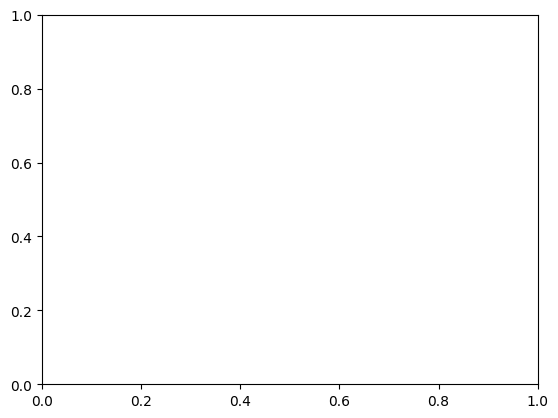

In [4]:
# def fish_density_dist(N, mean_fish_density, sigma_fish_density):
#     pr = scipy.stats.norm.pdf(N, mean_fish_density, sigma_fish_density)
#     return pr

# def volume_dist(N, mean_volume, sigma_volume):
#     pr = scipy.stats.norm.pdf(N, mean_volume, sigma_volume)
#     return pr

K   = 50
n   = 30
k_0 = 4
mean_fish_number = 10
std_fish_number = 1 # well it's about 30, because there are +-300m^3 of water and the fish have about 10^3 each. 

mean_volume = 5000   
std_volume = 300


N  = np.array(range(0, 1000))

def fish_density_dist(N, mean_fish_dens, sigma_fish_dens):
    pr = scipy.stats.norm.pdf(N, mean_fish_dens, sigma_fish_dens)
    return pr

def lake_volume_dist(N, mean_volume, sigma_volume):
    pr = scipy.stats.norm.pdf(N, mean_volume, sigma_volume)
    return pr


# MC method: 
fish_number_dist_prior = fish_density_dist(N, mean_fish_number, std_fish_number)
lake_volume_dist_prior = lake_volume_dist(N, mean_volume, std_volume)

N_fish = lake_volume_dist_prior/fish_number_dist_prior

print(f'N_fish: {N_fish}')
print(f"mean N_fish: {np.mean(N_fish)}")
print(f"std N_fish: {np.std(N_fish)}")
 

k_8 = 8
k_list = [4, 8]
for k in k_list:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fish_number_dist_prior = fish_number_dist(N, mean_fish_number, std_fish_number)
    likelihood = scipy.special.binom(K,k)*scipy.special.binom(N-K,n-k)/scipy.special.binom(N,n)
    posterior = fish_number_dist_prior * likelihood#/np.sum(fish_number_dist_prior * likelihood)
    ax.plot(N, likelihood, label=f'Likelihood k = {k}')
    ax.plot(N, posterior*1000, label=f'Fish informed Posterior (scaled) k = {k}')
    ax.plot(N, fish_number_dist_prior*10, label=f'Fish number prior (scaled), k = {k}')
    ax.set_xlabel('N - total population')
    ax.set_ylabel('likelihood')
    ax.set_title('Binomial Dist - Likelihood k = 8')
    ax.legend()
    plt.show()

If the gaussian uncertainty is doubled or tripled, how much closer are the likelihood 
 estimator values to the posterior estimator values for k=4 and k=8? 


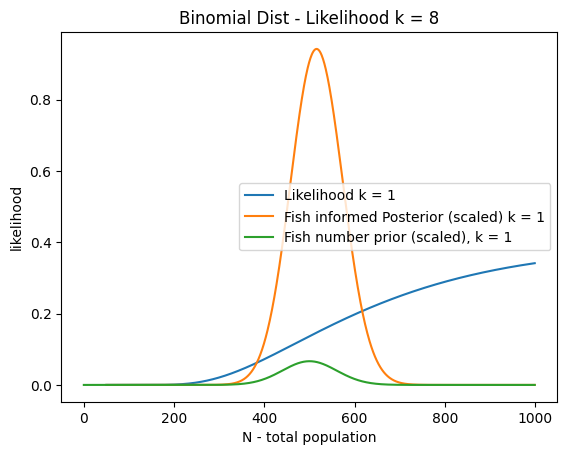

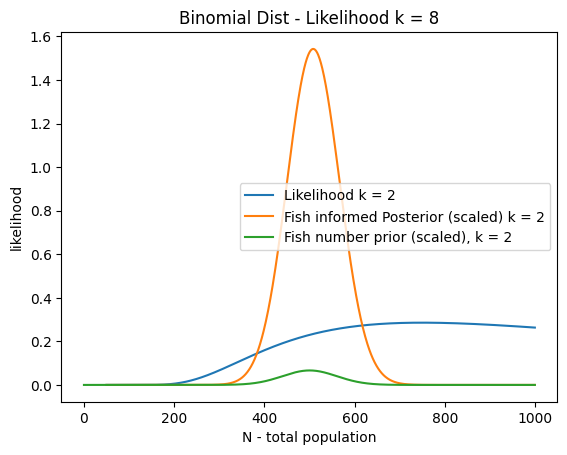

In [ ]:
print('If the gaussian uncertainty is doubled or tripled, how much closer are the likelihood \n estimator values to the posterior estimator values for k=4 and k=8? ')


k_8 = 8
k_list = [1, 2]
for k in k_list:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    fish_number_dist_prior = fish_number_dist(N, mean_fish_number, std_fish_number*2)
    likelihood = scipy.special.binom(K,k)*scipy.special.binom(N-K,n-k)/scipy.special.binom(N,n)
    posterior = fish_number_dist_prior * likelihood#/np.sum(fish_number_dist_prior * likelihood)
    ax.plot(N, likelihood, label=f'Likelihood k = {k}')
    ax.plot(N, posterior*1000, label=f'Fish informed Posterior (scaled) k = {k}')
    ax.plot(N, fish_number_dist_prior*10, label=f'Fish number prior (scaled), k = {k}')
    ax.set_xlabel('N - total population')
    ax.set_ylabel('likelihood')
    ax.set_title('Binomial Dist - Likelihood k = 8')
    ax.legend()
    plt.show()



In [ ]:
import io
import math
import sys

import numpy
import scipy
from scipy import special

from array import array


import ROOT
from ROOT import TCanvas, TH1F, TH1D, TLegend

savePlots = False

def prior(N):
    pr = 2
    return pr
# end def

def prior_2(N):
    pr = 1./N
    return pr
# end def

def prior_3( N, mean, sigma):
    pr = math.exp(-1./2*((N-mean)/sigma)**2)/(sigma*math.sqrt(2*math.pi))
    return pr
# end def


K   = 100
n   = 60
k_0 = 10
k_1 = 15


# h0   = TH1D("posterior_0", "Posterior for N", 2400, 0, 2400)
# h1   = TH1D("posterior_1", "Posterior for N", 2400, 0, 2400)
# hLH0 = TH1D("LH_0", "likelihood", 2400, 0, 2400)
# hLH1 = TH1D("LH_1", "likelihood", 2400, 0, 2400)
# hPrior = TH1D("prior", "prior", 2400, 0, 2400)

for N in range( 100, 2400):
    #thisprior = prior_3(N, 500, 30.5*5)
    thisprior = prior_2(N)
    #thisprior = 2
    prior1 = ( N, thisprior)

    likelihood = scipy.special.binom(K,k_0)*scipy.special.binom(N-K,n-k_0)/scipy.special.binom(N,n)
    hLH0.Fill( N, likelihood)
    posterior  =  likelihood * thisprior
    h0.Fill( N, posterior)

    likelihood = scipy.special.binom(K,k_1)*scipy.special.binom(N-K,n-k_1)/scipy.special.binom(N,n)
    hLH1.Fill( N, likelihood)
    posterior  = likelihood * thisprior
    h1.Fill( N, posterior)
## end for N

# h1.SetLineColor(2)
# h1.SetLineWidth(3)

# hLH1.SetLineColor(2)
# hLH1.SetLineStyle(2)
# hLH1.SetLineWidth(3)

# hLH0.SetLineStyle(2)
# hLH0.SetLineWidth(3)

# hPrior.SetLineColor(1)
# hPrior.SetLineWidth(2)

# # Because I don't care about the likelihood normalization
# h0.Scale(1./h0.Integral())
# h1.Scale(1./h1.Integral())
# hLH0.Scale(1./hLH0.Integral())
# hLH1.Scale(1./hLH1.Integral())
# hPrior.Scale(1./hPrior.Integral())

# tc0 = TCanvas()
# h0.SetStats(0)
# h0.Draw()
# h0.SetLineWidth(3)
# h0.GetXaxis().SetTitle("N estimate")
# h0.GetXaxis().SetRangeUser( 10, 2400)
# h0.GetYaxis().SetTitle("Probability")
# tc0.Update()


ModuleNotFoundError: No module named 'ROOT'